In [15]:
import datetime
import pandas_datareader.data as web
from sarimaxModel import sarimaxPrdict
from sarimaxModel import quickParameters
from sarimaxModel import selectParameters
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
# We will look at stock prices over the past year, starting at January 1, 2016


ticker='GOLD.AX'
months=12
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)

data=web.DataReader(ticker,"yahoo",start,end)['Adj Close']   

#y=data.resample('MS').mean()

#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
#parameters=selectParameters(ticker,y,steps=2,disp=True)
#['8CO.AX', 0, 0, 0, 0, 0, 0, 12, 't', -7.909122119923726, 0.03528654153968552]

#parameters=['MFG.AX', 0, 0, 1, 0, 1, 0, 12, 'n', 321.3071720270583, 0.486377988114156]
data=data['2019-04-01':]

In [16]:
y=data.resample('W').mean()

#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
parameters=selectParameters(ticker,y,steps=3,disp=False)

['GOLD.AX', 0, 0, 1, 0, 0, 0, 12, 'ct', 4.1523750655202702, 1.5564536855348532]


[0, 0, 1] [0, 0, 0, 12] ct


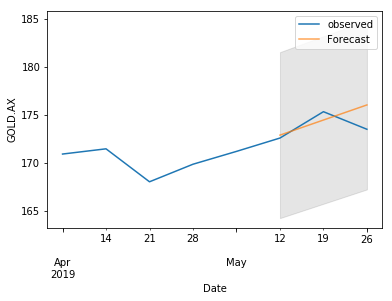

Date
2019-04-07    170.947498
2019-04-14    171.492001
2019-04-21    168.057499
2019-04-28    169.886663
2019-05-05    171.224005
Freq: W-SUN, Name: Adj Close, dtype: float64
Date
2019-05-12    172.613998
2019-05-19    175.360001
2019-05-26    173.529999
Freq: W-SUN, Name: Adj Close, dtype: float64
2019-05-12    172.918290
2019-05-19    174.490582
2019-05-26    176.063605
Freq: W-SUN, dtype: float64


In [17]:
import statsmodels.api as sm
import os
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
steps=3

train_y, test_y = y[:-steps], y[-steps:]

p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
print(p1,p2,t)
model = SARIMAX(train_y,
     order=p1,
     seasonal_order=p2,
     trend=t,
     enforce_stationarity=False,
     enforce_invertibility=False)

model_fit = model.fit(disp=False)

forcast=model_fit.forecast(steps=len(test_y))
 
pred_ci=pd.DataFrame(index=forcast.index)
pred_ci['low'] = forcast-forcast*0.05
pred_ci['upper'] = forcast+forcast*0.05


#pred_ci.loc[y.index[-1]]=[y[-1],y[-1]]
#pred_ci=pred_ci.sort_index()
ax = y['2019-04-01':].plot(label='observed')
forcast.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(forcast.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel(ticker)
plt.legend()

plt.show()
print(train_y)
print(test_y)
print(forcast) 

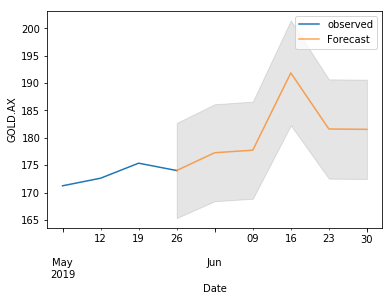

In [8]:

if( len(parameters)>0):
    
    p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
    result=sarimaxPrdict(ticker,y,p1,p2,t,steps=5,disp=True,days=20)
else:
    print("wrong parameters",len(parameters))

In [ ]:
result